In [4]:
from .TMclass import *

amount of compressed data + metadata: 12700.4 MB
number of datasets: 168
amount of compressed calibration data:  3397.4 MB


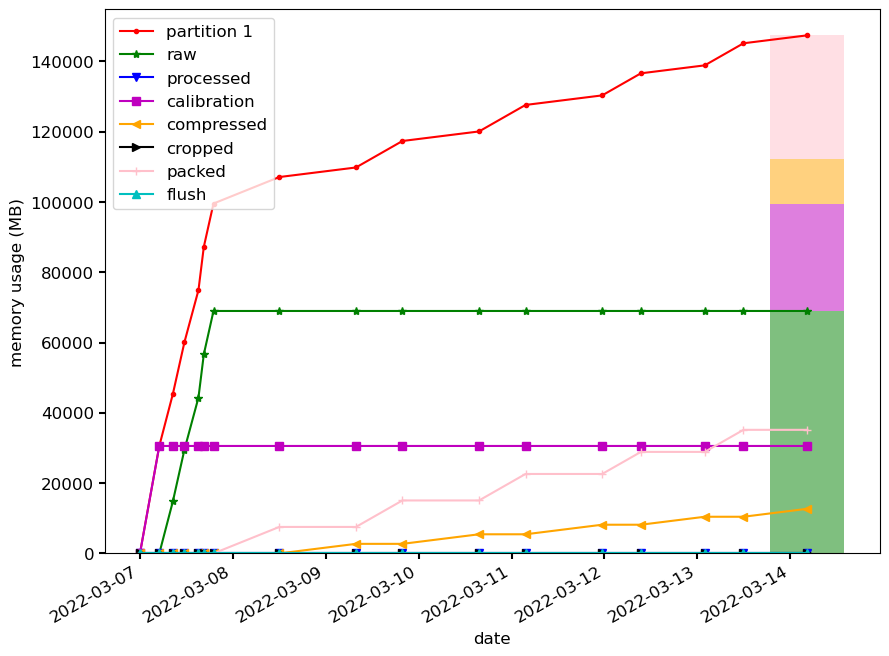

In [159]:
phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-07T00:00:00'))

#45 full raw datasets, packed and compressed to 6 bits (no metadata included)
t0 = datetime.datetime.fromisoformat('2022-03-07T00:30:00')
t1 = datetime.datetime.fromisoformat('2022-03-07T05:00:00')
c = PHI_MODE('CAL')
data_vol = 2048*2048*24*32/8e6 *(32+16+6)/32 * 45
kw = c.calibration(t0,t1,data_vol); phi.saving(1,**kw)

#Medium cadence, High res, 2-5 min, 3 quantities
t0 = datetime.datetime.fromisoformat('2022-03-07T05:30:00')
t1 = t0 + datetime.timedelta(hours=3)
a0 = PHI_MODE('HRT')
kw = a0.observation(t0,t1,cadence=5,shape=(2048,2048,4,6)); phi.saving(1,**kw)

#High cadence, High res
t0 = datetime.datetime.fromisoformat('2022-03-07T08:30:00')
t1 = t0 + datetime.timedelta(hours=3)
a1 = PHI_MODE('HRT')
kw = a1.observation(t0,t1,cadence=5,shape=(2048,2048,4,6)); phi.saving(1,**kw)

# TBD mosaic. Cadence = 6 minutes, full size, 25 or 36 datasets
t0 = datetime.datetime.fromisoformat('2022-03-07T11:30:00')
t1 = t0 + datetime.timedelta(minutes=217) #36 datasets
a2 = PHI_MODE('HRT')
kw = a2.observation(t0,t1,cadence=6,shape=(2048,2048,4,6)); phi.saving(1,**kw)

#high cadence, high res
t0 = datetime.datetime.fromisoformat('2022-03-07T16:00:00')
t1 = t0 + datetime.timedelta(minutes=30)
a3 = PHI_MODE('HRT')
kw = a3.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(1,**kw)

#low cadence, high res
t0 = datetime.datetime.fromisoformat('2022-03-07T16:30:00')
t1 = t0 + datetime.timedelta(hours=2,minutes=30)
a4 = PHI_MODE('HRT')
kw = a4.observation(t0,t1,cadence=5,shape=(2048,2048,4,6)); phi.saving(1,**kw)

# t0 = datetime.datetime.fromisoformat('2022-03-08T00:00:00')
# kw = a0.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=3); phi.saving(1,**kw)
# kw = a0.compressing(a0.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

# t0 = a0.compr.end
# kw = a1.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
# kw = a1.compressing(a1.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

# t0 = a1.compr.end
# kw = a3.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
# kw = a3.compressing(a3.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

# t0 = a3.compr.end
# kw = a4.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
# kw = a4.compressing(a4.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

"""
Downloading raw datasets
""" 

t0 = datetime.datetime.fromisoformat('2022-03-08T00:00:00')
kw = a0.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a0.compressing(a0.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

t0 = a0.compr.pack.end
kw = a1.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a1.compressing(a1.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

t0 = a1.compr.pack.end
kw = a2.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a2.compressing(a2.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

t0 = a2.compr.pack.end
kw = a3.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a3.compressing(a3.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

t0 = a3.compr.pack.end
kw = a4.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a4.compressing(a4.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)


# kw = a.cropping(t1, crop=2, ndata=-1, level='raw'); phi.saving(1,**kw)
# kw = a.processing(a.raw.end,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
# kw = a.compressing(a.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

print('amount of compressed data + metadata:',round(phi.part1.compr,1), 'MB')
print('number of datasets:',a0.raw.n_datasets + a1.raw.n_datasets + a2.raw.n_datasets + a3.raw.n_datasets + a4.raw.n_datasets)
print('amount of compressed calibration data: ',round(data_vol*6/(32+16+6),1),'MB')
phi.plot(1,bar=True)